# Get our environment set up
________

The first thing we'll need to do is load in the libraries and datasets we'll be using. For today, we'll be working with two datasets: one containing information on earthquakes that occured between 1965 and 2016, and another that contains information on landslides that occured between 2007 and 2016.

> **Important!** Make sure you run this cell yourself or the rest of your code won't work!

In [13]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("./earthquake-database/database.csv")
landslides = pd.read_csv("./landslide-events/catalog.csv")
volcanos = pd.read_csv("./volcanic-eruptions/database.csv")

# set seed for reproducibility
np.random.seed(0)

Now we're ready to look at some dates! (If you like, you can take this opportunity to take a look at some of the data.)

# Check the data type of our date column
___

For this part of the challenge, I'll be working with the `date` column from the `landslides` dataframe. The very first thing I'm going to do is take a peek at the first few rows to make sure it actually looks like it contains dates.

In [14]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Yep, those are dates! But just because I, a human, can tell that these are dates doesn't mean that Python knows that they're dates. Notice that the at the bottom of the output of `head()`, you can see that it says that the data type of this  column is "object". 

> Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it. 

If you check the pandas dtype documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), you'll notice that there's also a specific `datetime64` dtypes. Because the dtype of our column is `object` rather than `datetime64`, we can tell that Python doesn't know that this column contains dates.

We can also look at just the dtype of your column without printing the first few rows if we like:

In [15]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

# Convert our date columns to datetime
___

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it *is* recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

We can pandas what the format of our dates are with a guide called as ["strftime directive", which you can find more information on at this link](http://strftime.org/). The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are [lots of possible parts of a date](http://strftime.org/), but the most common are `%d` for day, `%m` for month, `%y` for a two-digit year and `%Y` for a four digit year.

Some examples:

 * 1/17/07 has the format "%m/%d/%y"
 * 17-1-2007 has the format "%d-%m-%Y"
 
 Looking back up at the head of the `date` column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates: 

In [16]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

# Select just the day of the month from our column
___

"Ok, Rachael," you may be saying at this point, "This messing around with data types is fine, I guess, but what's the *point*?" To answer your question, let's try to get information on the day of the month that a landslide occured on from the original "date" column, which has an "object" dtype: 

In [18]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

In [19]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

# Select just the day of the month from our column
___

"Ok, Rachael," you may be saying at this point, "This messing around with data types is fine, I guess, but what's the *point*?" To answer your question, let's try to get information on the day of the month that a landslide occured on from the original "date" column, which has an "object" dtype: 

In [20]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [21]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day

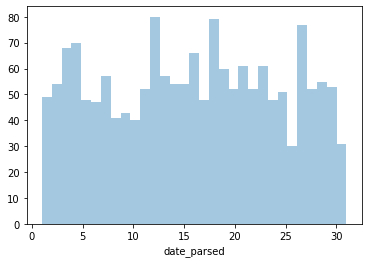

In [22]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

In [23]:
volcanos['Last Known Eruption'].sample(5)

764     Unknown
1069    1996 CE
34      1855 CE
489     2016 CE
9       1302 CE
Name: Last Known Eruption, dtype: object